<a href="https://colab.research.google.com/github/Lacikaki7/Cars-AI/blob/main/Projektlabor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the database

Our database contains data from Audi, BMW and Mercedes-Benz cars and contains approximately 50-50-50 data sets for each brand.

The dataset contains a total of 256 datasets. The characteristics include car brand (Brand), type (Type), date of production (Date of production), type of fuel (Type of fuel), rolling mill (Rolling mill), cylinders (Cylinders), engine size (Engine size), gearbox (Gearbox), fuel consumption (Fuel consumption), power (Power) and price (Price).

The data has been structured to help predict the price of cars based on each characteristic. Car price can be affected by fuel type, date of manufacture, engine power and other characteristics. The data are designed to help understand which factors contribute most to car prices and how they can be used to optimise pricing and car sales strategies.

# Az adatbázisról

Adatbázisunk olyan adatokat tartalmaz, amelyek az Audi, BMW és Mercedes-Benz autókról származnak, és mindegyik márka esetén kb. 50-50-50 adatsort tartalmaz.

A adatállomány összesen 256 adatsort tartalmaz. A jellemzők közé tartoznak: az autók márka (Brand), típusa (Type), gyártási dátuma (Date of production), üzemanyag típusa (Type of fuel), hengerek elrendezése (Rolling mill), hengerek száma (Cylinders), hengerűrtartalom (Engine size), váltó típusa (Gearbox), vegyes fogyasztás (Fuel consumption), teljesítmény (Power) és ár (Price).

Az adatokat úgy strukturálták, hogy segítsenek megjósolni az autók árát az egyes jellemzők alapján. Az autó árát befolyásolhatja az üzemanyag típusa, a gyártási dátum, a motor teljesítménye és egyéb jellemzők. Az adatok célja, hogy segítsenek megérteni, mely tényezők járulnak hozzá leginkább az autó árának alakulásához, és hogyan lehet ezeket felhasználni az árképzés és az autók értékesítési stratégiájának optimalizálásához.

# I. Data preparation

### Pre-preparation

In [2]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Lacikaki7/Cars-AI/main/autok4.csv")

In [3]:
df.head()

,Brand,Type,Date of production,Type of fuel,Rolling mill,Cylinders,Engine size (cm?),Gearbox,Fuel consumption (l),Power (HP),Price (Ft)
0,Audi,A1,2010,Gasoline,Serial,4,1390,Manual,5.3,122,5824750
1,Audi,A1,2012,Gasoline,Serial,4,1197,Manual,5.1,86,4574770
2,Audi,A1,2014,Gasoline,Serial,4,1390,Manual,4.9,140,6021300
3,Audi,A1,2015,Gasoline,Serial,3,999,Manual,4.2,95,5330740
4,Audi,A1,2015,Gasoline,Serial,4,1395,Manual,5.1,125,6183860


In [4]:
len(df)

257

In [5]:
df.isnull().sum()

Brand                    0
Type                     0
Date of production       0
Type of fuel             0
Rolling mill             0
Cylinders                0
Engine size (cm?)        0
Gearbox                  0
Fuel consumption (l)    27
Power (HP)               0
Price (Ft)               0
dtype: int64

In [6]:
mean_fuel_consumption = df['Fuel consumption (l)'].mean()
df['Fuel consumption (l)'].fillna(mean_fuel_consumption, inplace=True)
df.isnull().sum()

Brand                   0
Type                    0
Date of production      0
Type of fuel            0
Rolling mill            0
Cylinders               0
Engine size (cm?)       0
Gearbox                 0
Fuel consumption (l)    0
Power (HP)              0
Price (Ft)              0
dtype: int64

In [7]:
duplicates_index = df[df.duplicated(keep="first")].index
duplicates_index

Index([16], dtype='int64')

In [8]:
df.drop_duplicates(keep='first', inplace=True)
duplicates_index = df[df.duplicated(keep="first")].index
duplicates_index

Index([], dtype='int64')

**Overview: Structure of the Data preparation part.**

1.   Splitting the data to training and testing sets. We'll keep them separately, because testing data should be unseen.
2.   Data exploration in the training set
3.   Looking for outliers in the training set and drop them.
4.   Filling the missing values in the training set, drop the missing values in the test set to get realistic test results.
5.   Standardizing both datasets with the mean and standard deviation from the training set.

## 1. Splitting to training and testing sets

In [9]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Rolling mill'] = label_encoder.fit_transform(df['Rolling mill'])

df = pd.get_dummies(df, columns=['Brand'], prefix='Brand')

df = pd.get_dummies(df, columns=['Gearbox'], prefix='Gearbox')

df = pd.get_dummies(df, columns=['Type of fuel'], prefix='Fuel')

df.head()

,Type,Date of production,Rolling mill,Cylinders,Engine size (cm?),Fuel consumption (l),Power (HP),Price (Ft),Brand_Audi,Brand_BMW,Brand_Mercedes,Gearbox_Automatic,Gearbox_Manual,Fuel_Diesel,Fuel_Gasoline
0,A1,2010,0,4,1390,5.3,122,5824750,True,False,False,False,True,False,True
1,A1,2012,0,4,1197,5.1,86,4574770,True,False,False,False,True,False,True
2,A1,2014,0,4,1390,4.9,140,6021300,True,False,False,False,True,False,True
3,A1,2015,0,3,999,4.2,95,5330740,True,False,False,False,True,False,True
4,A1,2015,0,4,1395,5.1,125,6183860,True,False,False,False,True,False,True


In [10]:
df.drop(columns=['Type'], inplace=True)

df.head()

,Date of production,Rolling mill,Cylinders,Engine size (cm?),Fuel consumption (l),Power (HP),Price (Ft),Brand_Audi,Brand_BMW,Brand_Mercedes,Gearbox_Automatic,Gearbox_Manual,Fuel_Diesel,Fuel_Gasoline
0,2010,0,4,1390,5.3,122,5824750,True,False,False,False,True,False,True
1,2012,0,4,1197,5.1,86,4574770,True,False,False,False,True,False,True
2,2014,0,4,1390,4.9,140,6021300,True,False,False,False,True,False,True
3,2015,0,3,999,4.2,95,5330740,True,False,False,False,True,False,True
4,2015,0,4,1395,5.1,125,6183860,True,False,False,False,True,False,True


In [11]:
df.tail()

,Date of production,Rolling mill,Cylinders,Engine size (cm?),Fuel consumption (l),Power (HP),Price (Ft),Brand_Audi,Brand_BMW,Brand_Mercedes,Gearbox_Automatic,Gearbox_Manual,Fuel_Diesel,Fuel_Gasoline
252,2015,1,6,2987,9.9,245,28605050,False,False,True,True,False,True,False
253,2015,1,12,5980,17.0,630,88042700,False,False,True,True,False,False,True
254,2018,1,8,3982,13.1,585,50565000,False,False,True,True,False,False,True
255,2020,0,6,2925,9.6,330,39625000,False,False,True,True,False,True,False
256,2007,1,8,5439,15.9,500,40943250,False,False,True,True,False,False,True


In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Price (Ft)'])
y = df['Price (Ft)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

(204, 52, 204, 52)

In [13]:
X_train.head()

,Date of production,Rolling mill,Cylinders,Engine size (cm?),Fuel consumption (l),Power (HP),Brand_Audi,Brand_BMW,Brand_Mercedes,Gearbox_Automatic,Gearbox_Manual,Fuel_Diesel,Fuel_Gasoline
144,2019,0,4,1968,6.591739,204,True,False,False,True,False,True,False
85,2011,0,4,1968,4.700000,177,True,False,False,True,False,True,False
56,2000,0,4,1896,5.100000,131,True,False,False,False,True,True,False
221,2014,0,4,1461,3.600000,109,False,False,True,False,True,True,False
105,1997,1,6,2393,9.200000,165,True,False,False,False,True,False,True


## 2. Data exploration in the training set

In [14]:
X_train.isnull().sum()

Date of production      0
Rolling mill            0
Cylinders               0
Engine size (cm?)       0
Fuel consumption (l)    0
Power (HP)              0
Brand_Audi              0
Brand_BMW               0
Brand_Mercedes          0
Gearbox_Automatic       0
Gearbox_Manual          0
Fuel_Diesel             0
Fuel_Gasoline           0
dtype: int64

In [15]:
y_train.isnull().sum()

0

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204 entries, 144 to 103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date of production    204 non-null    int64  
 1   Rolling mill          204 non-null    int64  
 2   Cylinders             204 non-null    int64  
 3   Engine size (cm?)     204 non-null    int64  
 4   Fuel consumption (l)  204 non-null    float64
 5   Power (HP)            204 non-null    int64  
 6   Brand_Audi            204 non-null    bool   
 7   Brand_BMW             204 non-null    bool   
 8   Brand_Mercedes        204 non-null    bool   
 9   Gearbox_Automatic     204 non-null    bool   
 10  Gearbox_Manual        204 non-null    bool   
 11  Fuel_Diesel           204 non-null    bool   
 12  Fuel_Gasoline         204 non-null    bool   
dtypes: bool(7), float64(1), int64(5)
memory usage: 12.6 KB


In [17]:
X_train.describe()

,Date of production,Rolling mill,Cylinders,Engine size (cm?),Fuel consumption (l),Power (HP)
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,2009.867647,0.259804,4.710784,2215.382353,6.692737,195.078431
std,8.446711,0.439606,1.342625,829.162531,2.283413,97.877091
min,1993.000000,0.000000,3.000000,999.000000,1.600000,61.000000
25%,2002.000000,0.000000,4.000000,1598.000000,5.075000,131.000000
50%,2012.000000,0.000000,4.000000,1984.000000,6.400000,170.000000
75%,2016.000000,1.000000,6.000000,2771.500000,7.625000,230.250000
max,2024.000000,1.000000,12.000000,5980.000000,17.000000,630.000000


### Plotting

**Scatter plots**

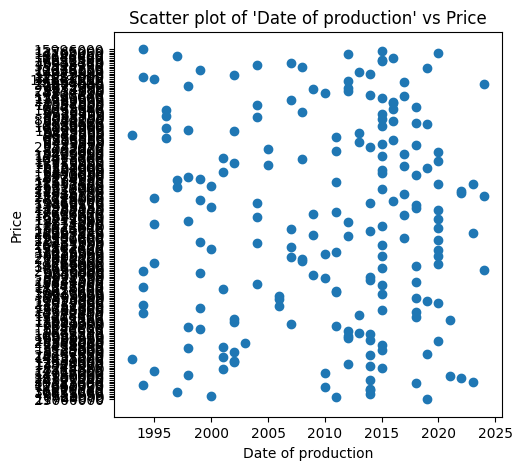

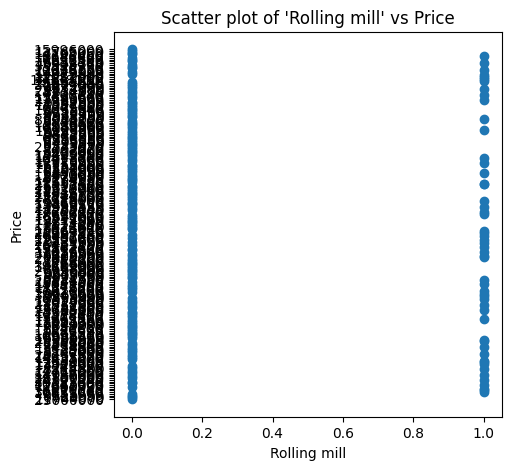

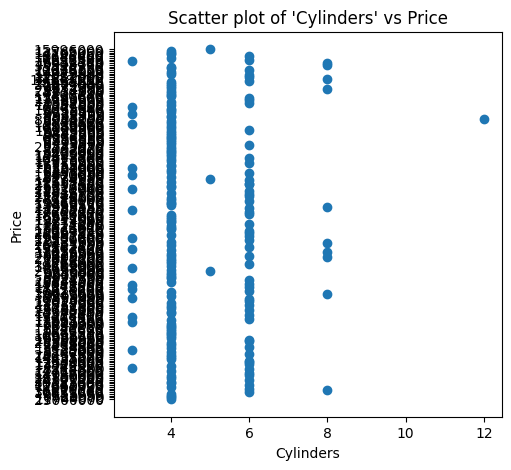

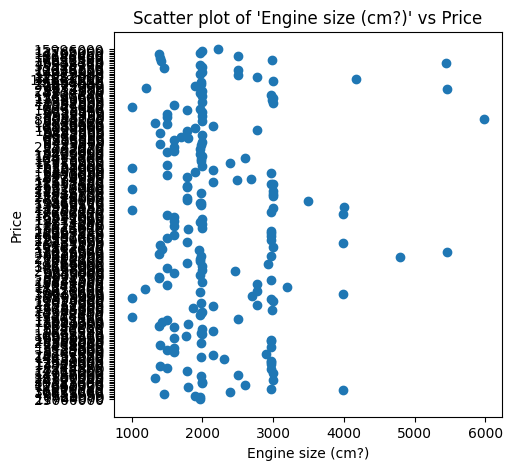

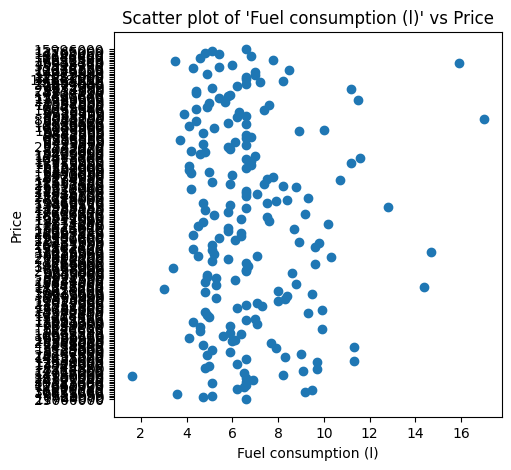

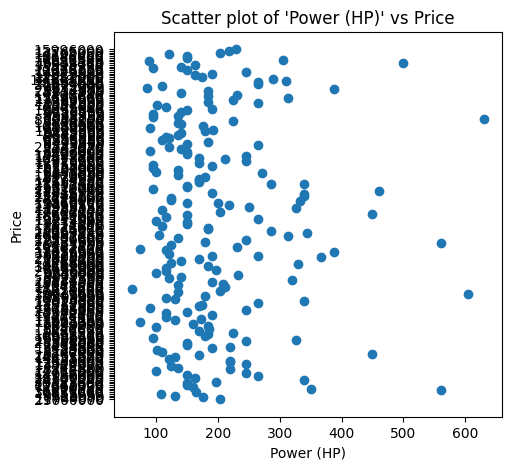

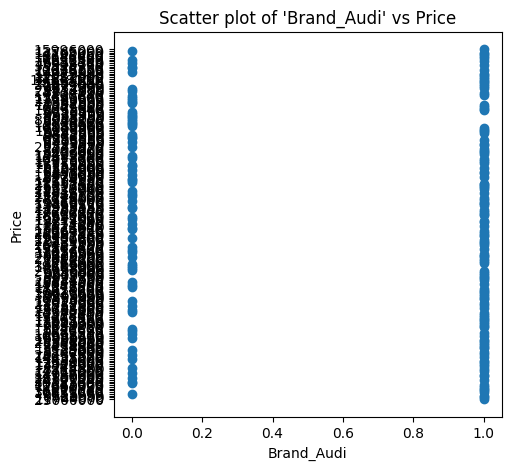

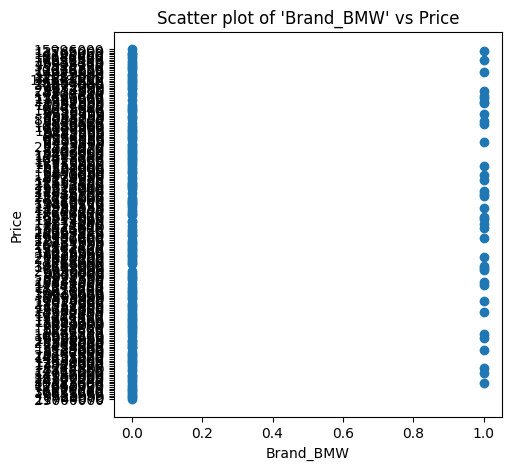

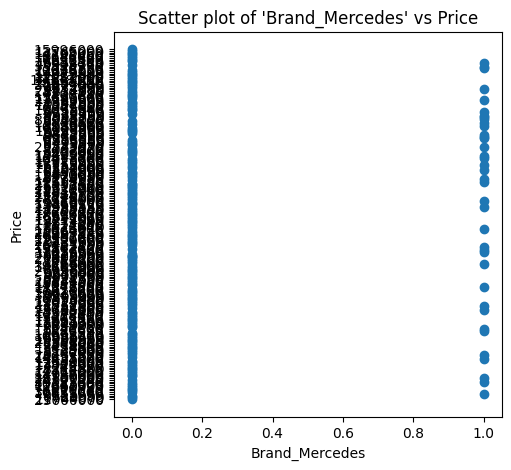

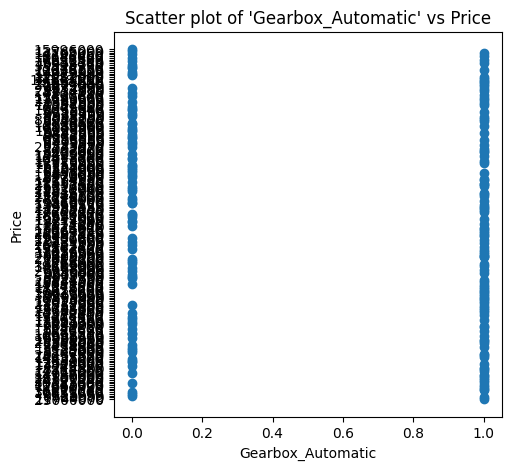

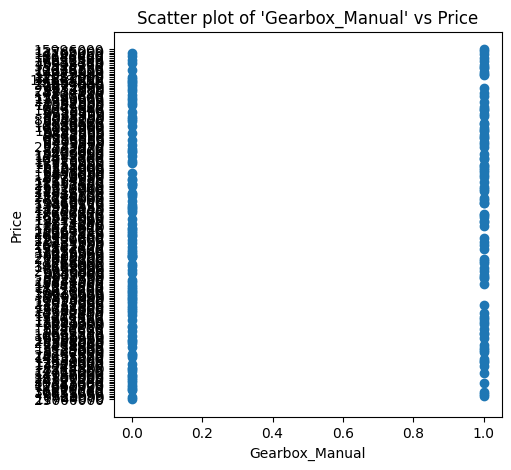

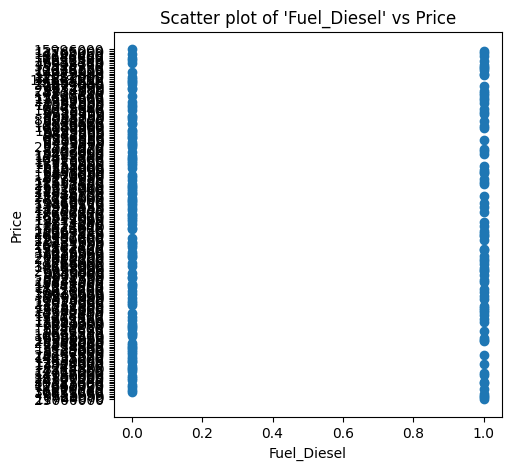

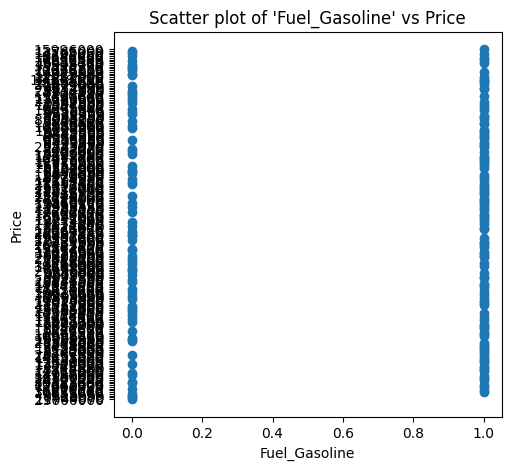

In [18]:
import matplotlib.pyplot as plt

column_names = list(X_train.columns)
for column in column_names:
    plt.figure(figsize=(5,5))
    plt.scatter(x=X_train[column], y=y_train)
    plt.title(f"Scatter plot of '{column}' vs Price")
    plt.xlabel(column)
    plt.ylabel("Price")
    plt.show()
    print("\n")

**Histograms**

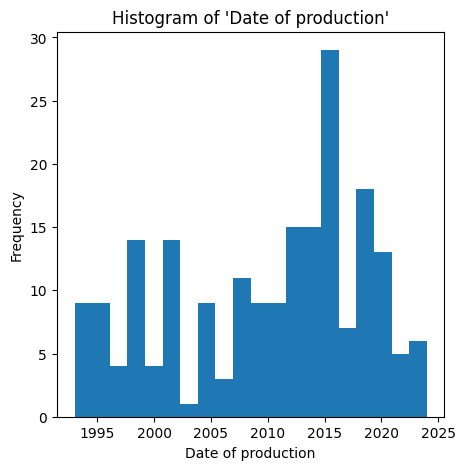

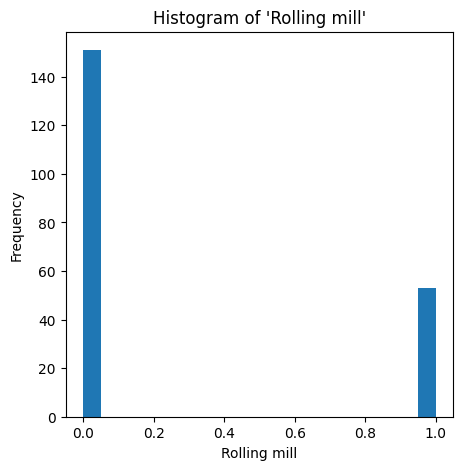

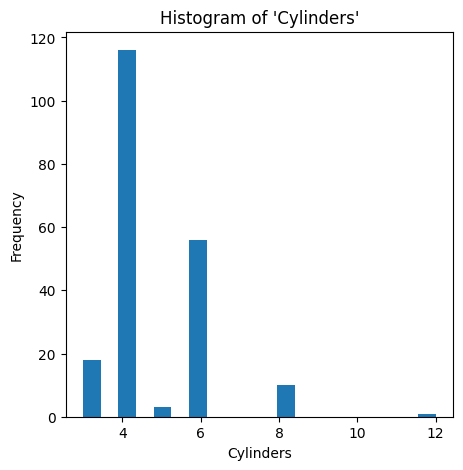

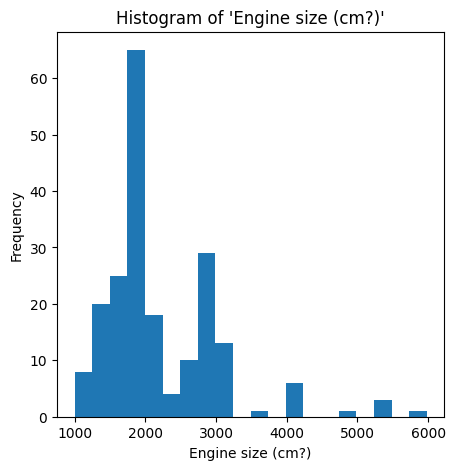

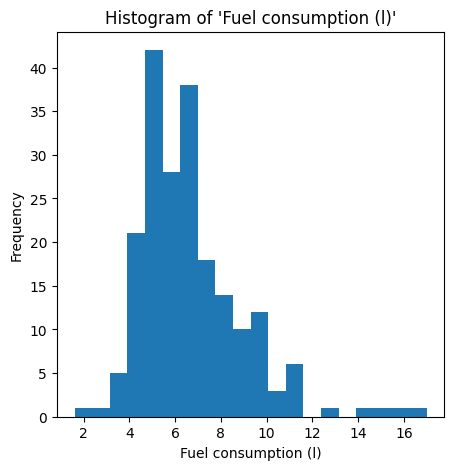

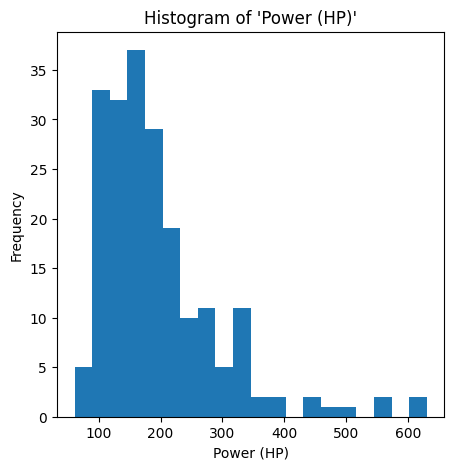

In [19]:
for column in column_names:
  if '_' not in column:
    plt.figure(figsize=(5, 5))
    plt.hist(X_train[column], bins=20)
    plt.title(f"Histogram of '{column}'")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    print("\n")

**Correlations**

In [20]:
df_train = X_train.copy()
df_train["target_class"] = y_train
df_train.corr()

,Date of production,Rolling mill,Cylinders,Engine size (cm?),Fuel consumption (l),Power (HP),Brand_Audi,Brand_BMW,Brand_Mercedes,Gearbox_Automatic,Gearbox_Manual,Fuel_Diesel,Fuel_Gasoline,target_class
Date of production,1.000000,-0.126011,-0.115894,-0.060285,-0.366204,0.271272,-0.190189,0.289935,-0.053750,0.211784,-0.211784,0.131436,-0.131436,0.301719
Rolling mill,-0.126011,1.000000,0.737202,0.724956,0.483639,0.522619,0.202189,-0.254745,0.003659,0.306780,-0.306780,0.055437,-0.055437,0.461417
Cylinders,-0.115894,0.737202,1.000000,0.897602,0.643240,0.750454,-0.022562,-0.084700,0.112718,0.351076,-0.351076,-0.007414,0.007414,0.738375
Engine size (cm?),-0.060285,0.724956,0.897602,1.000000,0.655175,0.811493,-0.143748,-0.012810,0.191322,0.372981,-0.372981,0.034700,-0.034700,0.722387
Fuel consumption (l),-0.366204,0.483639,0.643240,0.655175,1.000000,0.485736,-0.126276,-0.123028,0.279843,0.195383,-0.195383,-0.374725,0.374725,0.488090
Power (HP),0.271272,0.522619,0.750454,0.811493,0.485736,1.000000,-0.087128,0.068865,0.039334,0.368769,-0.368769,-0.120240,0.120240,0.805461
Brand_Audi,-0.190189,0.202189,-0.022562,-0.143748,-0.126276,-0.087128,1.000000,-0.620920,-0.620920,-0.018397,0.018397,-0.022258,0.022258,-0.131618
Brand_BMW,0.289935,-0.254745,-0.084700,-0.012810,-0.123028,0.068865,-0.620920,1.000000,-0.228916,-0.026571,0.026571,-0.011810,0.011810,-0.003595
Brand_Mercedes,-0.053750,0.003659,0.112718,0.191322,0.279843,0.039334,-0.620920,-0.228916,1.000000,0.049417,-0.049417,0.039450,-0.039450,0.167043
Gearbox_Automatic,0.211784,0.306780,0.351076,0.372981,0.195383,0.368769,-0.018397,-0.026571,0.049417,1.000000,-1.000000,0.100863,-0.100863,0.412268


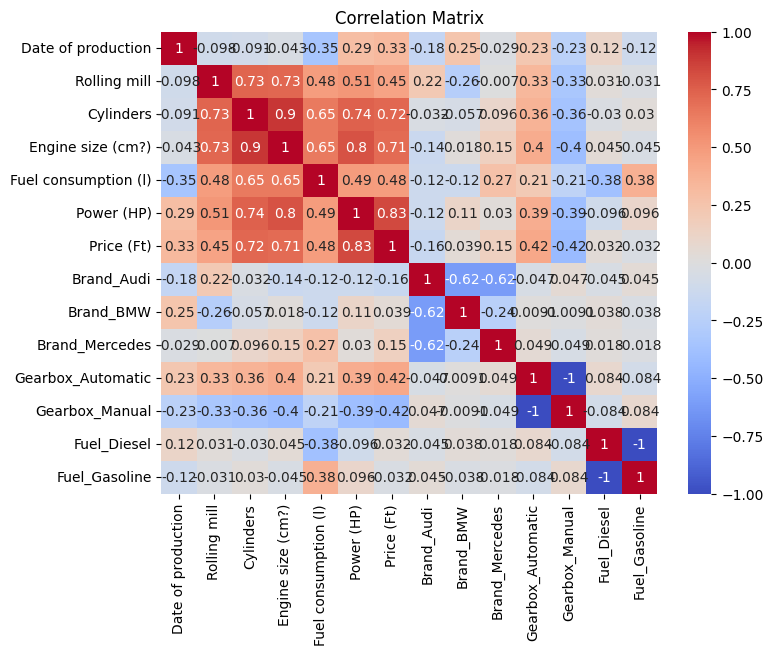

In [21]:
import seaborn as sns
correlation_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

## 3. Standardizing

In [22]:
X_train_mean = X_train.mean()
X_train_std = X_train.std()

X_train_scaled = (X_train - X_train_mean) / X_train_std
X_test_scaled = (X_test - X_train_mean) / X_train_std

X_train_scaled.head()

,Date of production,Rolling mill,Cylinders,Engine size (cm?),Fuel consumption (l),Power (HP),Brand_Audi,Brand_BMW,Brand_Mercedes,Gearbox_Automatic,Gearbox_Manual,Fuel_Diesel,Fuel_Gasoline
144,1.081173,-0.590993,-0.529399,-0.298352,-0.044231,0.091151,0.768661,-0.477277,-0.477277,0.895188,-0.895188,1.204444,-1.204444
85,0.134058,-0.590993,-0.529399,-0.298352,-0.872701,-0.184705,0.768661,-0.477277,-0.477277,0.895188,-0.895188,1.204444,-1.204444
56,-1.168224,-0.590993,-0.529399,-0.385187,-0.697524,-0.654683,0.768661,-0.477277,-0.477277,-1.111607,1.111607,1.204444,-1.204444
221,0.489226,-0.590993,-0.529399,-0.909812,-1.354436,-0.879454,-1.294587,-0.477277,2.084948,-1.111607,1.111607,1.204444,-1.204444
105,-1.523391,1.683773,0.960220,0.214213,1.098033,-0.307308,0.768661,-0.477277,-0.477277,-1.111607,1.111607,-0.826189,0.826189


In [23]:
X_test_scaled.head()

,Date of production,Rolling mill,Cylinders,Engine size (cm?),Fuel consumption (l),Power (HP),Brand_Audi,Brand_BMW,Brand_Mercedes,Gearbox_Automatic,Gearbox_Manual,Fuel_Diesel,Fuel_Gasoline
229,-0.931445,-0.590993,-0.529399,-0.505790,0.660092,-0.532080,-1.294587,-0.477277,2.084948,0.895188,-0.895188,-0.826189,0.826189
6,1.081173,-0.590993,-1.274209,-0.956848,-1.354436,-1.073575,0.768661,-0.477277,-0.477277,-1.111607,1.111607,-0.826189,0.826189
80,0.489226,1.683773,0.960220,0.940247,0.353534,-0.532080,0.768661,-0.477277,-0.477277,0.895188,-0.895188,-0.826189,0.826189
207,-1.523391,-0.590993,-0.529399,-0.986999,0.046975,-1.155311,-1.294587,-0.477277,2.084948,-1.111607,1.111607,-0.826189,0.826189
118,-0.931445,1.683773,0.960220,1.094620,1.448386,0.622429,0.768661,-0.477277,-0.477277,0.895188,-0.895188,-0.826189,0.826189


In [24]:
len(X_test_scaled)

52

# II. Models: Training and tuning

We'll use:

0.   Linear regression as baseline model
1.   Random forest
2.   XGBoost

## 0. Linear regression --- Baseline model

Mean Squared Error (MSE): 19119693000351.00
R-squared (R^2): 0.80

Első néhány sor a True és Predicted értékekkel:
    True Values  Predicted Values
229     9047250        9883802.15
6       6454370        3871826.93
80     12842190       13915176.78
207     3945000        4079101.55
118    13898000       16898202.80


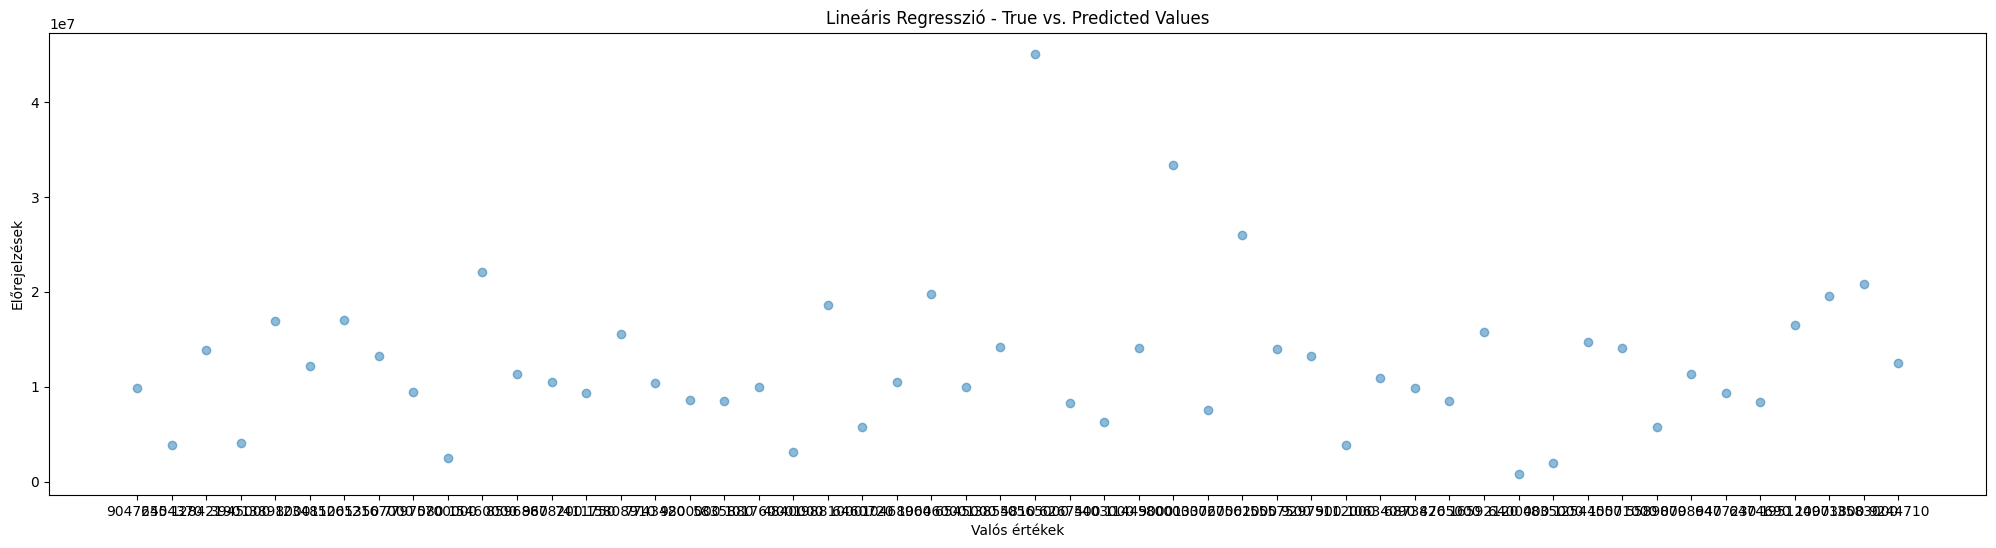

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}\n")

results_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred.round(2)})

print("Első néhány sor a True és Predicted értékekkel:")
print(results_df.head())

plt.figure(figsize=(25, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Valós értékek")
plt.ylabel("Előrejelzések")
plt.title("Lineáris Regresszió - True vs. Predicted Values")
plt.show()


## 1. Random forest

Random Forest Regression Results:
Train Mean Squared Error (MSE): 3110038224020.65
Train R-squared (R^2): 0.96
Test Mean Squared Error (MSE): 23864977471366.61
Test R-squared (R^2): 0.75



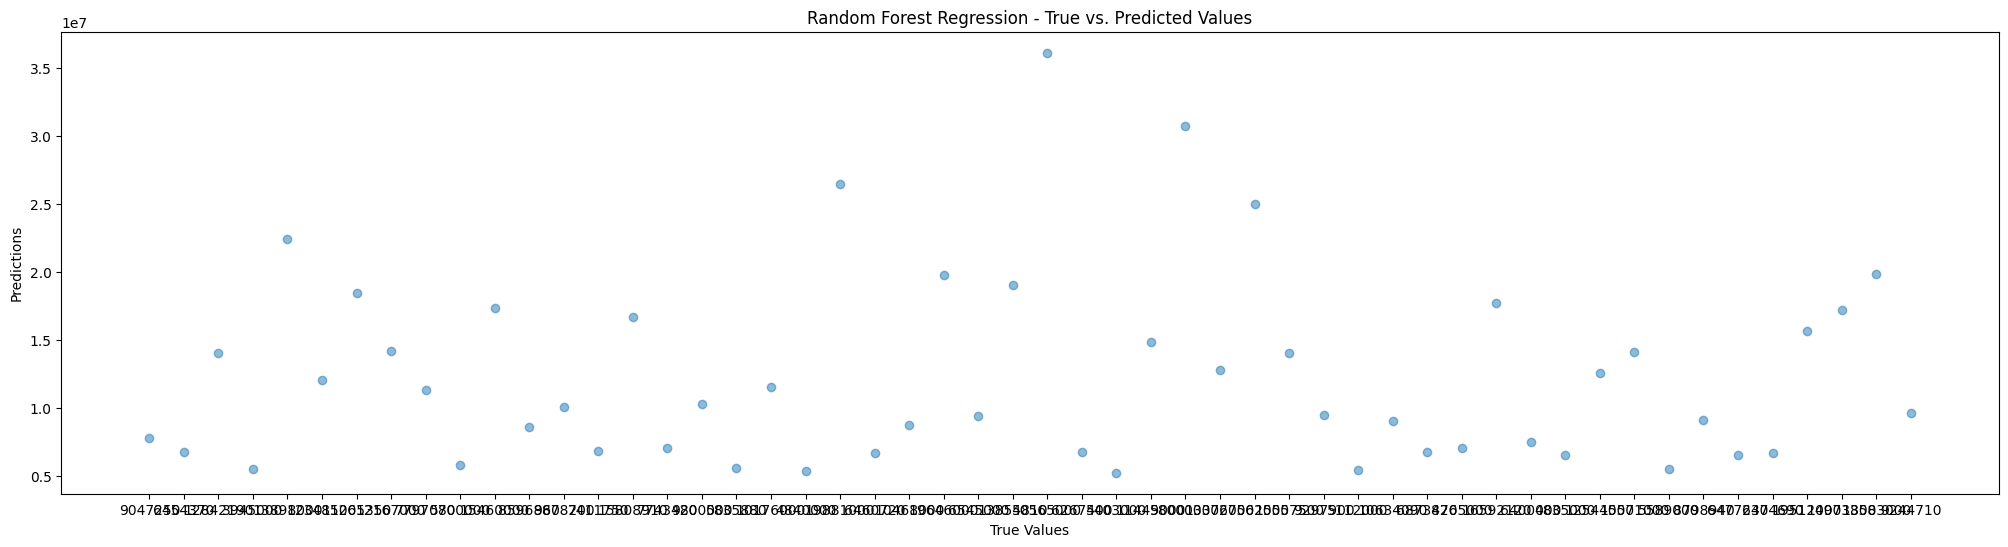


DataFrame with True and Predicted Values:
    True Values  Predicted Values
229     9047250        7808982.20
6       6454370        6750840.90
80     12842190       14058781.05
207     3945000        5509970.70
118    13898000       22436253.80


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_y_pred_train = rf_model.predict(X_train_scaled)
rf_y_pred_test = rf_model.predict(X_test_scaled)

rf_mse_train = mean_squared_error(y_train, rf_y_pred_train)
rf_mse_test = mean_squared_error(y_test, rf_y_pred_test)
rf_r2_train = r2_score(y_train, rf_y_pred_train)
rf_r2_test = r2_score(y_test, rf_y_pred_test)

results_rf = {
    "Train MSE": rf_mse_train,
    "Train R^2": rf_r2_train,
    "Test MSE": rf_mse_test,
    "Test R^2": rf_r2_test
}

print("Random Forest Regression Results:")
print(f"Train Mean Squared Error (MSE): {rf_mse_train:.2f}")
print(f"Train R-squared (R^2): {rf_r2_train:.2f}")
print(f"Test Mean Squared Error (MSE): {rf_mse_test:.2f}")
print(f"Test R-squared (R^2): {rf_r2_test:.2f}\n")

plt.figure(figsize=(25, 6))
plt.scatter(y_test, rf_y_pred_test, alpha=0.5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Random Forest Regression - True vs. Predicted Values")
plt.show()

results_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': rf_y_pred_test})

print("\nDataFrame with True and Predicted Values:")
print(results_df.head())

## 2. XGBoost

XGBoost Mean Squared Error (MSE): 20272282256111.64
XGBoost R-squared (R^2): 0.78


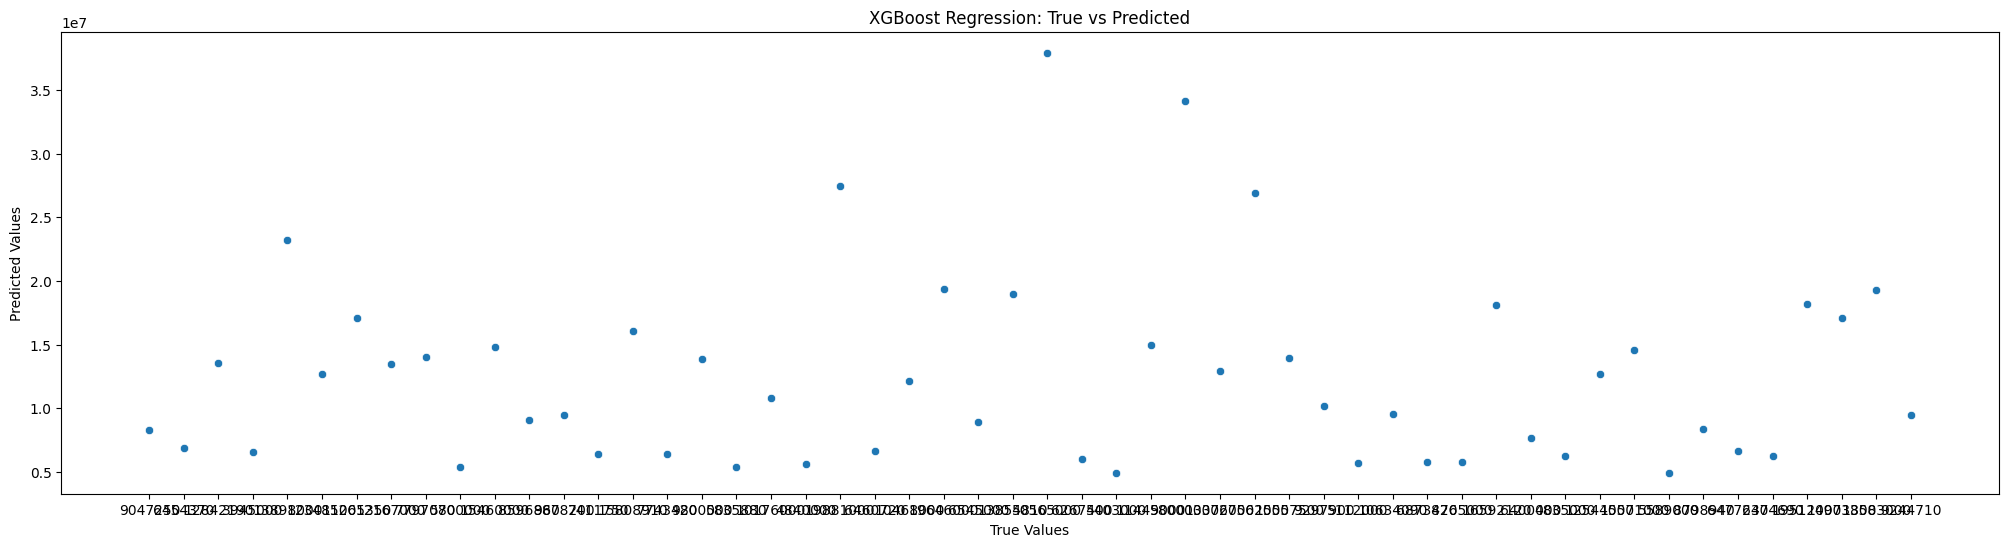

DataFrame with True and Predicted Values (XGBoost):
    True Values  Predicted Values
229     9047250         8260525.0
6       6454370         6855685.5
80     12842190        13535233.0
207     3945000         6562005.5
118    13898000        23218808.0


In [27]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

xgb_model = xgb.XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

xgb_y_pred = xgb_model.predict(X_test_scaled)

xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)

print(f"XGBoost Mean Squared Error (MSE): {xgb_mse:.2f}")
print(f"XGBoost R-squared (R^2): {xgb_r2:.2f}")

plt.figure(figsize=(25, 6))
sns.scatterplot(x=y_test, y=xgb_y_pred)
plt.title('XGBoost Regression: True vs Predicted')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

results_df_xgb = pd.DataFrame({'True Values': y_test, 'Predicted Values': xgb_y_pred})

print("DataFrame with True and Predicted Values (XGBoost):")
print(results_df_xgb.head())

# III. Other type of tuning

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search.fit(X_train_scaled, y_train)

best_rf_model = grid_search.best_estimator_

y_pred = best_rf_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f"Best Random Forest Regression MSE: {mse:.2f}")

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Random Forest Regression MSE: 22569651116625.62
Best parameters found by GridSearchCV:
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
